In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read the CSV file
df = pd.read_csv('./departures_for_foreign_employment_1986_2012_0.csv')

# Display the contents of the DataFrame
df.head()


,Year,Male No.,Male %,Female No.,Female %,Total
0,1986,11023,76.25,3433,23.75,14456
1,1987,10647,75.37,3480,24.63,14127
2,1988,8309,45.09,10119,54.91,18428
3,1989,8680,35.11,16044,64.89,24724
4,1990,15377,36.08,27248,63.92,42625


In [147]:
df.describe()

,Year,Male No.,Male %,Female No.,Female %,Total
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1999.000000,62987.407407,40.278519,95332.000000,59.721481,158319.407407
std,7.937254,43565.988038,13.405267,46916.639267,13.405267,85031.529601
min,1986.000000,8309.000000,24.990000,3433.000000,23.750000,14127.000000
25%,1992.500000,26846.000000,32.660000,66713.500000,52.160000,94738.500000
50%,1999.000000,59793.000000,35.510000,116015.000000,64.490000,179735.000000
75%,2005.500000,92033.000000,47.840000,127199.500000,67.340000,216584.000000
max,2012.000000,143784.000000,76.250000,138547.000000,75.010000,282331.000000


In [148]:
cols = df.columns
print(cols)
df.rename(columns={cols[1]: 'Male_No',cols[3]:'Female_No'}, inplace=True)
df.head()

Index(['Year', 'Male No. ', 'Male %', ' Female No. ', 'Female %', ' Total '], dtype='object')


,Year,Male_No,Male %,Female_No,Female %,Total
0,1986,11023,76.25,3433,23.75,14456
1,1987,10647,75.37,3480,24.63,14127
2,1988,8309,45.09,10119,54.91,18428
3,1989,8680,35.11,16044,64.89,24724
4,1990,15377,36.08,27248,63.92,42625


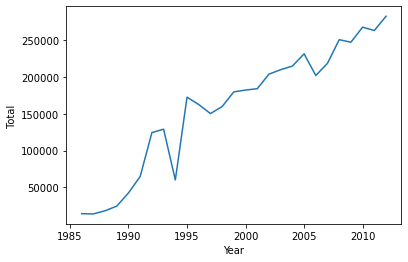

In [149]:
sns.lineplot(x='Year', y=cols[5], data=df)
plt.show()

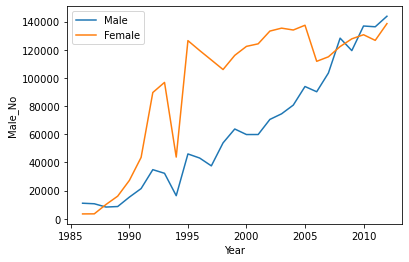

In [150]:



sns.lineplot(x='Year', y='Male_No', data=df)
sns.lineplot(x='Year', y='Female_No', data=df)

plt.legend(['Male', 'Female'])
plt.show()


In [151]:
import statsmodels.api as sm

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Fit the SARIMA model
model = sm.tsa.statespace.SARIMAX(df['Male_No'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast the trend for the next 5 years
forecast = model_fit.get_forecast(steps=5)

# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print the forecasted trend
print(predicted_values)
print(confidence_intervals)



/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihoo

2013-01-01    143434.568151
2014-01-01    152274.567100
2015-01-01    157116.014320
2016-01-01    168522.527191
2017-01-01    171322.848549
Freq: AS-JAN, Name: predicted_mean, dtype: float64
            lower Male_No  upper Male_No
2013-01-01  124782.699519  162086.436784
2014-01-01  126129.890484  178419.243716
2015-01-01  125012.225150  189219.803490
2016-01-01  131549.197855  205495.856528
2017-01-01  129929.006646  212716.690453


/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


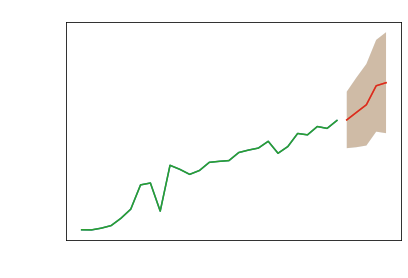

In [161]:
# Fit the SARIMA model for Total
model_total = sm.tsa.statespace.SARIMAX(df[' Total '], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_total = model_total.fit()

# Forecast the trend for the next 5 years for Total
forecast_total = model_fit_total.get_forecast(steps=5)
predicted_values_total = forecast_total.predicted_mean
confidence_intervals_total = forecast_total.conf_int()

# Plot the forecasted trend for Total
plt.plot(df.index, df[' Total '], label='Total')
plt.plot(predicted_values_total.index, predicted_values_total, label='Total (Forecast)')

# Fill the confidence intervals
plt.fill_between(confidence_intervals_total.index, confidence_intervals_total['lower  Total '], confidence_intervals_total['upper  Total '], alpha=0.3)


# Plot the forecasted trend for Total
plt.plot(df.index, df[' Total '], label='Total')
plt.plot(predicted_values_total.index, predicted_values_total, label='Total (Forecast)')

# Fill the confidence intervals
plt.fill_between(confidence_intervals_total.index, confidence_intervals_total['lower  Total '], confidence_intervals_total['upper  Total '], alpha=0.3)

# Set the color of the x-axis and y-axis values to white
plt.tick_params(colors='white')

plt.xlabel('Year', color='white')
plt.ylabel('Number of Departures', color='white')
plt.title('Forecasted Trend of Departures for Total', color='white')


plt.show()


/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(d

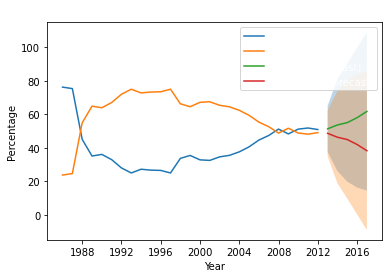

In [176]:
# Fit the SARIMA model for Male %
model_male_percent = sm.tsa.statespace.SARIMAX(df['Male %'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_male_percent = model_male_percent.fit()

# Forecast the trend for the next 5 years for Male %
forecast_male_percent = model_fit_male_percent.get_forecast(steps=5)
predicted_values_male_percent = forecast_male_percent.predicted_mean
confidence_intervals_male_percent = forecast_male_percent.conf_int()

# Fit the SARIMA model for Female %
model_female_percent = sm.tsa.statespace.SARIMAX(df['Female %'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_female_percent = model_female_percent.fit()

# Forecast the trend for the next 5 years for Female %
forecast_female_percent = model_fit_female_percent.get_forecast(steps=5)
predicted_values_female_percent = forecast_female_percent.predicted_mean
confidence_intervals_female_percent = forecast_female_percent.conf_int()

# Plot the forecasted trends for Male % and Female %
plt.plot(df.index, df['Male %'], label='Male %')
plt.plot(df.index, df['Female %'], label='Female %')
plt.plot(predicted_values_male_percent.index, predicted_values_male_percent, label='Male % (Forecast)')
plt.plot(predicted_values_female_percent.index, predicted_values_female_percent, label='Female % (Forecast)')

# Fill the confidence intervals
plt.fill_between(confidence_intervals_male_percent.index, confidence_intervals_male_percent['lower Male %'], confidence_intervals_male_percent['upper Male %'], alpha=0.3)
plt.fill_between(confidence_intervals_female_percent.index, confidence_intervals_female_percent['lower Female %'], confidence_intervals_female_percent['upper Female %'], alpha=0.3)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Forecasted Trend of Male % and Female %')
plt.legend(['Male %', 'Female %', 'Male % (Forecast)', 'Female % (Forecast)'])

plt.show()
